In [1]:
import pandas as pd

# Study case: Stock [MultiIndex & Reshaping]

The Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources, currently including:

- Yahoo! Finance
- Google Finance
- St.Louis FED (FRED)
- Kenneth French’s data library
- World Bank
- Google Analytics

In [2]:
from pandas_datareader import data

In [4]:
symbol = ['AAPL', 'FB','GOOGL']
source = 'yahoo'
start_date = '2018-01-01'
end_date = '2019-04-24'

stock = data.DataReader(symbol,
               source,
               start_date, 
               end_date)

stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

If you do not have the `pandas_datareader` module installed, or if you're following along this coursebook without an active connection, you can instead load it from the serialized object I stored in your `data_cache` folder. 

Creating the DataFrame object by reading from `pickle`:
- `stock = pd.read_pickle('data_cache/stock')`

Serializing the DataFrame object to a byte stream using `pickle`:
- `stock.to_pickle('data_cache/stock')`

In [5]:
stock.to_pickle('stock')

In [6]:
stock = pd.read_pickle('stock')

stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

## MultiIndex DataFrame

You may notice that above dataframe has a 2-level column (`Attributes` & `Symbols`. If we observe the axes of the dataframe, pandas will return the following result:

In [7]:
stock.head()
stock.axes

stock.axes[1] 
# equivalent to
stock.columns

MultiIndex([(     'High',  'AAPL'),
            (     'High',    'FB'),
            (     'High', 'GOOGL'),
            (      'Low',  'AAPL'),
            (      'Low',    'FB'),
            (      'Low', 'GOOGL'),
            (     'Open',  'AAPL'),
            (     'Open',    'FB'),
            (     'Open', 'GOOGL'),
            (    'Close',  'AAPL'),
            (    'Close',    'FB'),
            (    'Close', 'GOOGL'),
            (   'Volume',  'AAPL'),
            (   'Volume',    'FB'),
            (   'Volume', 'GOOGL'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',    'FB'),
            ('Adj Close', 'GOOGL')],
           names=['Attributes', 'Symbols'])

[From pandas documentation:](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

> *Hierarchical / Multi-level indexing is very exciting as it opens the door to some quite sophisticated data analysis and manipulation, especially for working with higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).*

Benefits of multi index:

1. Easy manipulation via `stack()` and `unstack()`

2. Easy math when there are multiple column levels

In [8]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

In [9]:
stock_long = stock.stack()

# using `unstack()`
stock_long.unstack

# combining `unstack()` and transpose
stock_long.unstack().T
#stock_long.unstack().transpose()

# using transpose
stock_long.T.head()

stock.stack(level='Attributes').head()

Symbols                      AAPL          FB        GOOGL
Date       Attributes                                     
2018-01-02 Adj Close   167.701889  181.419998  1073.209961
           Close       172.259995  181.419998  1073.209961
           High        172.300003  181.580002  1075.979980
           Low         169.259995  177.550003  1053.020020
           Open        170.160004  177.679993  1053.020020

### MultiIndex Slicer Method

Say, we want to specifically observe the stock's closing price. We can easily subset it by a simple dot/bracket notation: 

In [10]:
stock.head()

stock['Close']
stock.Close.head()

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.259995,181.419998,1073.209961
2018-01-03,172.229996,184.669998,1091.520020
2018-01-04,173.029999,184.330002,1095.760010
2018-01-05,175.000000,186.850006,1110.290039
2018-01-08,174.350006,188.279999,1114.209961


But now, let's take a look back to our stock data:

In [11]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

What if, we want to observe all Apple's stock price level? We can do that with the help of `pandas` MultiIndex slicers method, `.xs()`:

In [12]:
stock.xs('AAPL', level='Symbols', axis=1)[['Close']].head()

Attributes,Close
Date,
2018-01-02,172.259995
2018-01-03,172.229996
2018-01-04,173.029999
2018-01-05,175.000000
2018-01-08,174.350006


**Note on MultiIndex DataFrame:**

Some people might find MultiIndex makes data easier to view, but makes it more difficult to manipulate. We can convert a MultiIndex to a single level index by simply reset the index:

In [13]:
stock_long.reset_index().head()

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,AAPL,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
1,2018-01-02,FB,181.580002,177.550003,177.679993,181.419998,18151900.0,181.419998
2,2018-01-02,GOOGL,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
3,2018-01-03,AAPL,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
4,2018-01-03,FB,184.779999,181.330002,181.880005,184.669998,16886600.0,184.669998


## Data Reshaping

### `stack()` and `unstack()`

`stack()` stack the prescribed level(s) from columns to index and is particularly useful on DataFrames having a multi-level columns. It does so by "shifting" the columns to create new levels on its index. 

This is easier understood when we just see an example. Notice that `stock` has a 2-level column (Attributes and Symbols) and 1-level index (Date):

In [14]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

When we stack the `stock` DataFrame, we shrink the number of levels on its column by one: `stock` now has 1-level column named `Attributes`: 

In [15]:
stock.stack().head()

Attributes                 High          Low         Open        Close  \
Date       Symbols                                                       
2018-01-02 AAPL      172.300003   169.259995   170.160004   172.259995   
           FB        181.580002   177.550003   177.679993   181.419998   
           GOOGL    1075.979980  1053.020020  1053.020020  1073.209961   
2018-01-03 AAPL      174.550003   171.960007   172.529999   172.229996   
           FB        184.779999   181.330002   181.880005   184.669998   

Attributes              Volume    Adj Close  
Date       Symbols                           
2018-01-02 AAPL     25555900.0   167.701889  
           FB       18151900.0   181.419998  
           GOOGL     1588300.0  1073.209961  
2018-01-03 AAPL     29517900.0   167.672668  
           FB       16886600.0   184.669998

`unstack()` does the opposite: it "shifts" the levels from index axis onto column axis. Try and create a stack DataFrame, and then apply `unstack` on the new DataFrame to see it return to the original shape:

In [16]:
stock_long.head()

Attributes                 High          Low         Open        Close  \
Date       Symbols                                                       
2018-01-02 AAPL      172.300003   169.259995   170.160004   172.259995   
           FB        181.580002   177.550003   177.679993   181.419998   
           GOOGL    1075.979980  1053.020020  1053.020020  1073.209961   
2018-01-03 AAPL      174.550003   171.960007   172.529999   172.229996   
           FB        184.779999   181.330002   181.880005   184.669998   

Attributes              Volume    Adj Close  
Date       Symbols                           
2018-01-02 AAPL     25555900.0   167.701889  
           FB       18151900.0   181.419998  
           GOOGL     1588300.0  1073.209961  
2018-01-03 AAPL     29517900.0   167.672668  
           FB       16886600.0   184.669998

In [17]:
stock_long.unstack().head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  167.701889  181.419998  1073.209961  
2018-01-03  167.672668  184.669998  1091.520020  
2018-01-04  168.451508  184.330002  1095.760010  
2018-01-05  170.369385  186.850006  1110.290039  
2018-01-08  169.736588  188.279999  1114.209961

**Dive Deeper**:

1. Pass `stack()` method to `stock` DataFrame and save it as an object named `stock_long`

2. Using `stock_long`, create a new dataframe called `aapl` which stores the stock prices of Apple only

In [18]:
## Your code here:
# 1
stock_long = stock.stack()
stock_long.head()

# 2
aapl = stock_long.xs('AAPL', level='Symbols')
aapl.head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,168.451508
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588


### `melt()`

Speaking of reshaping a DataFrame from wide format to long, another method that should be in your toolset is `melt()`.

Now, let's take a look of our `aapl` dataframe:

In [19]:
aapl.shape

(329, 6)

The DataFrame above is wide: it has 329 rows and 6 columns. The `melt()` function gathers all the columns into one and store the value corresponding to each column such that the resulting DataFrame has 329 * 6 = 1,974 rows, along with the identifier and values columns:

In [159]:
aapl_melted = aapl.melt()
aapl_melted.head()

#aapl_melted.shape
aapl.melt().head()

,Attributes,value
0,High,172.300003
1,High,174.550003
2,High,173.470001
3,High,175.369995
4,High,175.610001


We can optionally specify one or more columns to be identifier variables (`id_vars`), which treat all other columns as value variables (`value_vars`):

In [21]:
aapl.reset_index().melt(id_vars='Date',
                       value_vars= ['Open','Close'])

,Date,Attributes,value
0,2018-01-02,Open,170.160004
1,2018-01-03,Open,172.529999
2,2018-01-04,Open,172.539993
3,2018-01-05,Open,173.440002
4,2018-01-08,Open,174.350006
5,2018-01-09,Open,174.550003
6,2018-01-10,Open,173.160004
7,2018-01-11,Open,174.589996
8,2018-01-12,Open,176.179993
9,2018-01-16,Open,177.899994


#### pivot

In [22]:
aapl_melted_2 = aapl.reset_index().melt(id_vars='Date',
                       value_vars= ['Open','Close'])

aapl_melted_2.pivot(index = 'Date',
                   columns= 'Attributes').head()

value            
Attributes       Close        Open
Date                              
2018-01-02  172.259995  170.160004
2018-01-03  172.229996  172.529999
2018-01-04  173.029999  172.539993
2018-01-05  175.000000  173.440002
2018-01-08  174.350006  174.350006

**Why should we reshape our data?**

It is common that data format extracted from a database does not meet the formatting you need for further purpose of analysis. In EDA, you might need to reshape your data as part of your data preparation for a visualization.

pandas have several functions to reshape your data:
- `stack()` & `unstack()`
- `melt()` & `pivot()`
- `.T` or `transpose()`

Example on how reshaping data is helpful on visualization:

In [23]:
stock_long = stock.stack()

In [24]:
stock_long['Close'].plot()

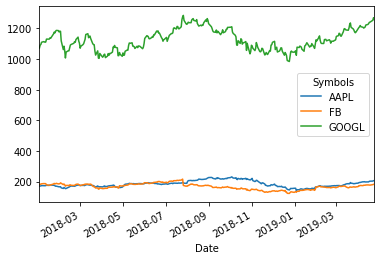

In [25]:
stock_long['Close'].unstack().plot()

**Dive Deeper**:

Use `la-traffic.csv` to answer the following questions. 

1. Create a plot which shows the total daily visitors growth from all devices!

In [26]:
## Your code here

la = pd.read_csv('la-traffic.csv')
la.head()

,Date,Device Category,Browser,Total Visitors,Sessions,Bounce Rate
0,2019-06-01,desktop,Firefox,38,38,0.0000
1,2019-06-01,mobile,Android Webview,38,38,100.0000
2,2019-06-01,mobile,Chrome,77,77,49.3506
3,2019-06-01,desktop,Chrome,997,1073,24.9767
4,2019-06-01,desktop,Edge,115,115,66.9565


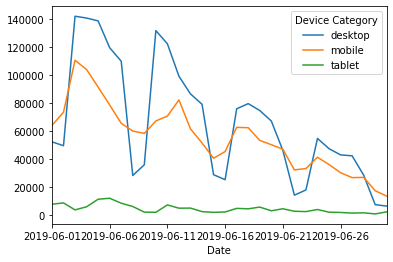

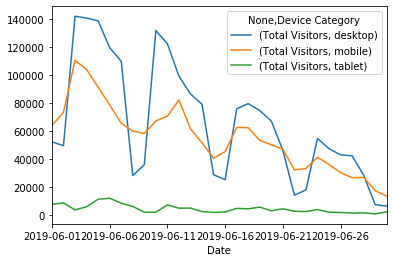

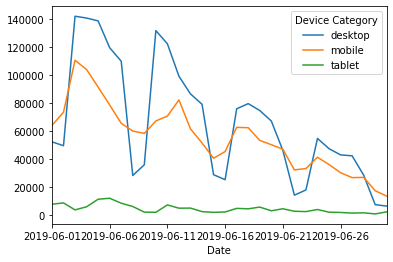

In [27]:
# using crosstab
pd.crosstab(index= la['Date'],
              columns= la['Device Category'],
              values= la['Total Visitors'],
              aggfunc= 'sum').plot()


# using pivot table
pd.pivot_table(data= la,
              index= ['Date'],
              columns= ['Device Category'],
              values= ['Total Visitors'],
              aggfunc= 'sum').plot()

pd.pivot_table(data= la,
              index= ['Date'],
              columns= ['Device Category'],
              aggfunc= 'sum')['Total Visitors'].plot()

---

# Study case: Online Retail [GroupBy , Visualization]

## Data Preparation

Before we start to visualize our data, it is always necessary to inspect and prepare our data in the first place.

The data we're going to use in this section is `online_retail.csv`.  This dataset consist of transaction data of an online retail shops provided from UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/datasets/online+retail). All the transactions occurring between end of 2010 to end of 2011 for a UK-based and registered non-store online retail.

 The following is the data glossary provided for this dataset:
- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. *If this code starts with letter 'c', it indicates a **cancellation**.*  
- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- `Description`: Product (item) name. Nominal.   
- `Quantity`: The quantities of each product (item) per transaction. Numeric.	  
- `InvoiceDate`: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- `UnitPrice`: Unit price. Numeric, Product price per unit in sterling.   
- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.   
- `Country`: Country name. Nominal, the name of the country where each customer resides.  


In [35]:
import pandas as pd
import matplotlib as plt

In [3]:
retail = pd.read_csv("online_retail.csv")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


**Discussion**:

1. Recall what you've learned about data inspection in the previous courses. Do all of our data have stored in the correct datatypes?

2. Notice how `InvoiceNo` consist of a cancelled invoice. Do you think it's supposed to be part of our analysis?

3. Create a new column, `TotalPrice` which stores the total cost of the order!

*Tip*: To check which InvoiceNo is cancelled (starts with letter '*c*'), create a **conditional subsetting** and combine it with `.str.contains()` method 

If you are able to answer the previous questions without any trouble, good job! Remember, always be skeptical when you receive a new data. Understand the structure thoroughly to avoid any misinterpretation from your data.

In the following cell, we adjust our datatypes an remove all Invoice containing 'c' character to remove all cancelled transactions from our analysis:

In [4]:
# Your Code Here
retail['InvoiceDate'] = retail['InvoiceDate'].astype('datetime64')
retail['Country'] = retail['Country'].astype('category')

retail.dtypes

# return total of cancelled invoice
retail['InvoiceNo'].str.contains('^c', case=False).sum()
retail['InvoiceNo'].str.startswith('C').sum()
# return data of cancelled invoice
retail[retail['InvoiceNo'].str.startswith('C')].head()

retail['TotalPrice'] = retail['Quantity'] * retail['UnitPrice']

In [5]:
retail = retail[~retail['InvoiceNo'].str.startswith('C')]

retail.InvoiceNo.str.startswith('C').sum()

0

##  Frequency & Aggregation Tables

In [32]:
retail.InvoiceDate.describe()

count                  235657
unique                   9545
top       2010-12-06 16:57:00
freq                      675
first     2010-12-01 08:26:00
last      2011-06-26 10:59:00
Name: InvoiceDate, dtype: object

Aggregation is a method of summarizing a group of values in order to return a single value.

So far, we have explored several pandas aggregational toolkit, such as:
- `pd.crosstab()`
- `pd.pivot_table()`

In this chapter, we'll explore another pandas' aggregating tools:
- `groupby` aggregation.

**Discussion:**<br>
(`pivot_table` & `pd.crosstab` equivalency)

The `pivot_table` method and the `crosstab` function can both produce the exact same results with the same shape. They both share the parameters; `index`, `columns`, `values`, and `aggfunc`. 

The major difference on the surface is that `crosstab` is a function and not a DataFrame method. This forces you to use columns as Series and not string names for the parameters.

1. Suppose you want to compare the number of total transactions over Weekdays of each quarter period. Create a `pivot_table` that solve the problem!


2. Try to reproduce the same result by using `crosstab`


3. What if, instead of compare the total transactions, you want to compare the total revenue from the same period? Use both `pivot_table` and `crosstab` as the solution. Discuss with your friend, which method is more relevant in this case?

In [6]:
## Your code here
retail['Weekday'] = retail['InvoiceDate'].dt.weekday_name
retail['Quarter'] = retail['InvoiceDate'].dt.to_period('Q')
retail.head()

#1
pd.pivot_table(
    data=retail,
    index='Quarter',
    columns='Weekday',
    aggfunc='size'
)

#2
pd.crosstab(
    index=retail['Quarter'],
    columns=retail['Weekday']
)

#3
pd.crosstab(
    index=retail['Quarter'],
    columns=retail['Weekday'],
    values=retail['TotalPrice'],
    aggfunc='sum'
)

pd.pivot_table(
    data=retail,
    index = 'Quarter',
    columns= 'Weekday',
    values = 'TotalPrice',
    aggfunc='sum'
)

Weekday,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
Quarter,,,,,,
2010Q4,151544.960,119626.30,56638.93,162763.57,192177.02,140995.36
2011Q1,318532.200,312347.48,113906.52,367006.32,509253.76,311589.53
2011Q2,321079.591,291631.54,158078.96,408950.64,412892.78,351366.65


### Using Group By

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets will find the group by operation a familiar strategy in many analysis-heavy workflow.

Let's answer the previous business questions with `groupby` method:

In [7]:
retail.groupby(['Quarter','Weekday'], as_index=False).sum()
retail.groupby(['Quarter','Weekday']).sum()#[['TotalPrice']]

Quantity  UnitPrice   CustomerID  TotalPrice
Quarter Weekday                                                
2010Q4  Friday        53041  41386.640   48617112.0  151544.960
        Monday        55238  35093.180   63059931.0  119626.300
        Sunday        30853  13293.290   71987467.0   56638.930
        Thursday      85917  30396.270   90229522.0  162763.570
        Tuesday       61484  51065.650   48270108.0  192177.020
        Wednesday     71737  28669.440   84076813.0  140995.360
2011Q1  Friday       166252  60754.130  140624163.0  318532.200
        Monday       156109  74454.760  175667339.0  312347.480
        Sunday        62628  28992.700  141948950.0  113906.520
        Thursday     199973  72138.300  198657569.0  367006.320
        Tuesday      281394  82300.640  194068757.0  509253.760
        Wednesday    160582  64892.680  188843080.0  311589.530
2011Q2  Friday       144612  57174.721  152009472.0  321079.591
        Monday       140288  72393.820  162313913.0  291631.540
        Sunday        94205  32855.470  174972116.0  158078.960
        Thursday     227097  72614.310  239633752.0  408950.640
        Tuesday      160663  91433.860  204967821.0  412892.780
        Wednesday    204400  58238.910  197870264.0  351366.650

Notice how by using group by you are limited to calculate every numeric column with function as you provide it. You can make use of `agg` to combine it with our `groupby` function.

In the next cell, not only observing revenue of our Sales, we also wont to figure out the number of unique customers that purchasing our products in each period:

groupby - agg pair

In [8]:
retail.groupby(['Quarter','Weekday']).agg({
    'TotalPrice' : 'sum',
    'CustomerID' : lambda x: x.unique().size
})

TotalPrice  CustomerID
Quarter Weekday                          
2010Q4  Friday     151544.960       147.0
        Monday     119626.300       172.0
        Sunday      56638.930       126.0
        Thursday   162763.570       274.0
        Tuesday    192177.020       155.0
        Wednesday  140995.360       255.0
2011Q1  Friday     318532.200       405.0
        Monday     312347.480       435.0
        Sunday     113906.520       271.0
        Thursday   367006.320       508.0
        Tuesday    509253.760       477.0
        Wednesday  311589.530       487.0
2011Q2  Friday     321079.591       463.0
        Monday     291631.540       406.0
        Sunday     158078.960       378.0
        Thursday   408950.640       630.0
        Tuesday    412892.780       522.0
        Wednesday  351366.650       514.0

**Notes on `crosstab`, `pivot_table` and `groupby`:**
- `crosstab` was built for counting
- Relative frequency / proportion table -- the unique functionality with `crosstab`
- use `pivot_table` when comparing groups
- the result of a `groupby` is going to be in tidy form, which lends itself to easier subsequent analysis, but isn’t as interpretable.

**Dive Deeper:**

Say we are interested in the number sales generated by our business. To do that it is easier to have a data frame that holds unique invoice information per row. Knowing that each invoice repetition would have the same `CustomerID`, `Country` and `InvoiceDate`, we can use the first data occurrence for each invoice.

Now try to complete the following faded example and see what kind of data frame it is creating:

```
invoice = retail.groupby('InvoiceNo').agg({
    'StockCode': lambda x: x.unique().size,
    'TotalPrice': '___',
    'CustomerID': '___',
    'Country': 'first',
    'InvoiceDate': '___'
})
```

In [9]:
invoice = retail.groupby('InvoiceNo').agg({
    'StockCode': lambda x: x.unique().size,
    'TotalPrice': 'sum',
    'CustomerID': 'first',
    'Country': 'first',
    'InvoiceDate': 'first'
}).rename(
    columns= {
        'StockCode' : 'ItemBought'
    }
)

invoice.head()

,ItemBought,TotalPrice,CustomerID,Country,InvoiceDate
InvoiceNo,,,,,
536365,7,139.12,17850.0,United Kingdom,2010-12-01 08:26:00
536366,2,22.20,17850.0,United Kingdom,2010-12-01 08:28:00
536367,12,278.73,13047.0,United Kingdom,2010-12-01 08:34:00
536368,4,70.05,13047.0,United Kingdom,2010-12-01 08:34:00
536369,1,17.85,13047.0,United Kingdom,2010-12-01 08:35:00


## Visualization

### Visualizing Comparison

The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

In the following cell, we calculate our revenue based on customer's Country, and directly pass `.plot(kind='bar')` afterwards to create a bar graph. A bar graph makes it easy to compare sets of data between different groups at a glance

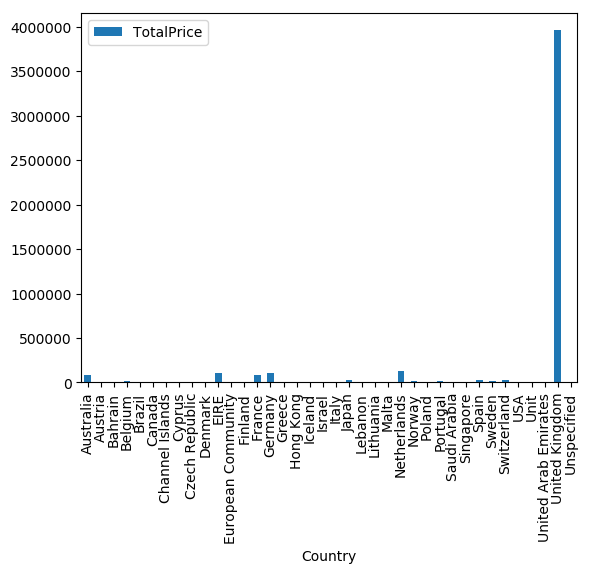

In [54]:
invoice.\
groupby('Country').\
agg({'TotalPrice' : 'sum'}).plot(kind='bar')

The bar graph above shows that mostly our revenue came from United Kingdom. The fact that the data's actually generated from a UK-based online retail doesn't validate our action to generally compare our sales from every countries in the `Country` list.

It will be wiser for us to specifically compare, for example, our international market, by excluding United Kingdom from our observations:

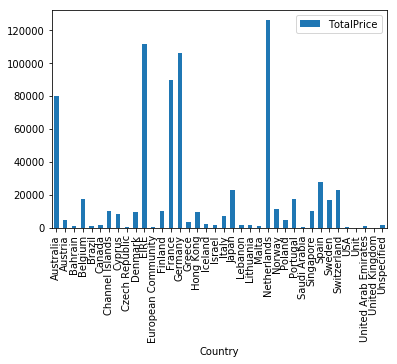

In [11]:
invoice_int = invoice[invoice.Country != 'United Kingdom'].copy()

invoice_int.\
groupby('Country').\
agg({'TotalPrice' : 'sum'}).\
plot(kind='bar')

**Notice that even we have removed 'United Kingdom' from our dataset, the plot above still shows the category even though it only shows empty data.** In the cell below, we copy paste the code above, but we also add `.cat.remove_unused_categories()` to drop the level away from our `Country` category:

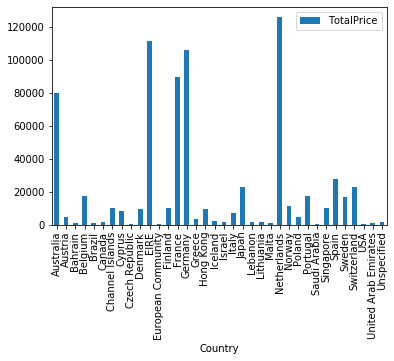

In [48]:
invoice_int = invoice[invoice.Country != 'United Kingdom'].copy()
invoice_int.Country = invoice_int.Country.cat.remove_unused_categories()


invoice_int.\
groupby('Country').\
agg({'TotalPrice' : 'sum'}).\
plot(kind='bar')

From above, we can get clearer insight; there are several countries that could possibly be our biggest markets outside UK. 

We can also improve our plot efficiency by **sorting the `Total Price` values in advance**, so then the bars from our plot will be arranged based on the value, rather than the country's alphabetical order. Compare the barplot we create below to the previous one, which one gives you better information?

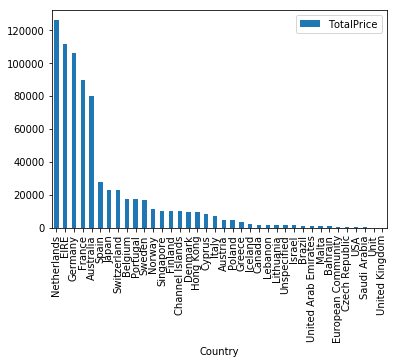

In [12]:
invoice_int.\
groupby('Country').\
agg({'TotalPrice' : 'sum'}).\
sort_values('TotalPrice', ascending=False).\
plot(kind='bar')

**Discussion:**

One disadvantage of vertical bar graphs is that they don't leave much room at the bottom of the chart if long labels are required. In pandas, we can also create horizontal bar graph, with `hbar` plot type. Try to create one to show ten countries with highest sales *in average*. 

Discuss the result with your classmate, what are the differences between comparing the Sales with *sum* and *mean*?

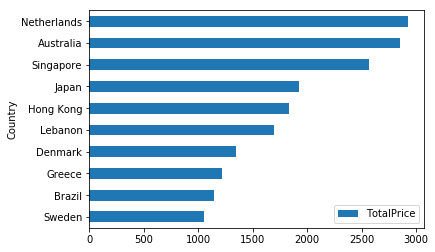

In [13]:
## Your code here

invoice_int.\
groupby('Country').\
agg({'TotalPrice' : 'mean'}).\
sort_values('TotalPrice', ascending=False).\
head(10).\
sort_values('TotalPrice', ascending=True).\
plot(kind='barh')


#### Mulitple Categories Bar

Bar charts are one of the most commonly used types of graph because they are simple to create and very easy to interpret. They are also a flexible chart type and there are several variations of the standard bar chart including horizontal bar charts, grouped or component charts, and stacked bar charts. 

Grouped bar charts are a way of showing information about different sub-groups of the main categories. 

Now back to our international market sales data:

In [14]:
invoice_int.InvoiceDate.describe()

count                     859
unique                    842
top       2011-05-11 14:37:00
freq                        2
first     2010-12-01 08:45:00
last      2011-06-24 15:51:00
Name: InvoiceDate, dtype: object

We can see that the data we have was the historical transactions between December 2010 to June 2011. Each month, every country may shows different sales behaviour.

**Discussion**:

1. Using `groupby`, try to create a DataFrame which stores the information of five countries with the highest monetary within each month!

*Tip*:
- You will need to group the data twice, and will also need the help of `sort_values` to complete this task!

In [15]:
# Your code here
invoice_int['InvoiceMonth'] = invoice_int.InvoiceDate.dt.to_period('M')


invoice_top_month = invoice_int.groupby(['InvoiceMonth','Country']).\
agg({'TotalPrice' : 'sum'}).\
sort_values(['InvoiceMonth','TotalPrice'], ascending=False).\
groupby(['InvoiceMonth']).\
head(5)

invoice_top_month.head(15)

TotalPrice
InvoiceMonth Country                
2011-06      Australia      23426.81
             EIRE           19551.94
             France         16012.89
             Netherlands    12829.63
             Germany        12030.73
2011-05      Netherlands    29185.88
             Germany        25751.20
             EIRE           18008.76
             France         17614.88
             Australia      13638.41
2011-04      Germany        12315.54
             Singapore       8209.58
             EIRE            7570.50
             Japan           6548.50
             France          5529.61

The more convenient way to compare the sales performance within each month, and each countries is to display it as bar charts. When visualizing multiple groups with bar charts, there are two bar kinds that we can explore; **grouped bar** and **stacked bar**.

By default, when we pass `plot(kind='bar')` to a multiple groups data, `matplotlib` will return a broup bar chart:

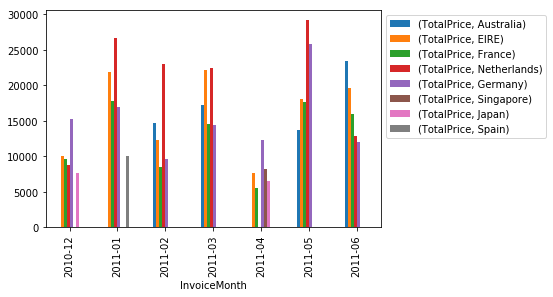

In [16]:
invoice_top_month.unstack().\
plot(kind='bar').\
legend(bbox_to_anchor=(1, 1)) # put legend outside box

To turn it into a stacked bar chart, we could add `stacked=True` parameter to our plot: 

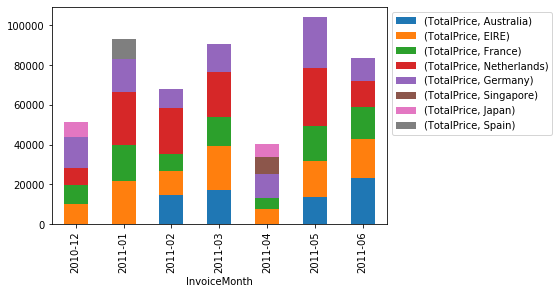

In [54]:
invoice_top_month.unstack().\
plot(kind='bar',
     stacked=True).\
legend(bbox_to_anchor=(1, 1)) 

**Knowledge Check**:

1. List the informations you get by observing the plot above!

2. Create a grouped/stacked bar plot from `ItemBought` variable. Discuss with your friend, what are the insights that you found from the plot.

In [40]:
# Your code below



### Visualizing Distribution

#### Histogram

Some of you might have using histogram to visualize a single variable data distribution, but do you think there is any difference between Histogram and Bar charts?

Histogram is a chart representing a frequency distribution; heights of the bars represent observed frequencies. In other words a histogram is a graphical display of data using bars of different heights. Usually, there is no space between adjacent Bars.

Here is the main difference between them. With bar charts, each column represents a group defined by a categorical variable; and with histograms, each column represents a group defined by a quantitative variable.

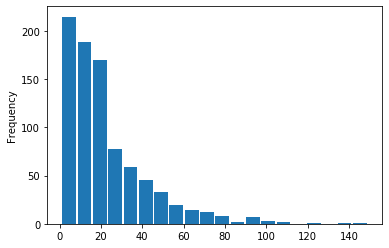

In [101]:
invoice_int['ItemBought'].plot(kind='hist',
                              bins=20,
                              rwidth = 0.9)

#### Boxplot

Another common way to statistically inspecting a data is using box plot, a handy visualization tools that provide a five number summary for your data. It contains several components:
- First quantile  
- Median  
- Third quantile  
- Inner and outer fence  
- Outliers  

To see how we can utilize it in action, we shall use `pandas` built-in `boxplot()` function:

In [18]:
invoice_monthly = invoice_int.\
groupby(['Country','InvoiceMonth']).\
agg({'TotalPrice': 'sum'})

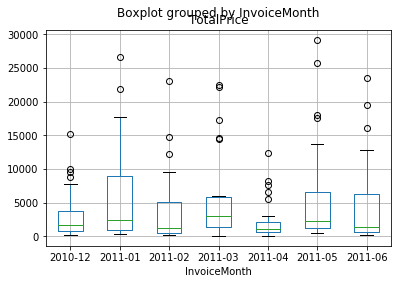

In [19]:
invoice_monthly.\
boxplot(column = 'TotalPrice', by='InvoiceMonth')

Providing the column name for `column` as the y-axis and `by` as the x-axis will provide us a very simple, yet useful box plot that shows different distribution shape for each monthly revenue.

**Discussion:**

1. How do you interpret the above boxplot? Which month is considered to be a "bad" month, and which one seems to indicates a good one?

2. Identifying outliers can also help us accelerate our exploratory process. For example, let's take our lowest performing month, April 2011. We see that the whisker are located around ~3000, means if we subset our dataset we could identify which countries are there. Now try to identify the outliers from **June 2011**, how would you subset it and what countries are there?

In [20]:
# MultiIndex Approach
invoice_monthly.head()
june = invoice_monthly.xs('2011-06', level='InvoiceMonth')
june[june['TotalPrice'] > 13000]

,TotalPrice
Country,
Australia,23426.81
EIRE,19551.94
France,16012.89


In [21]:
# SingleIndex Approach
invoice_monthly = invoice_monthly.reset_index()
invoice_monthly[(invoice_monthly['InvoiceMonth'] == '2011-06') &
                (invoice_monthly['TotalPrice'] > 13000)]



,Country,InvoiceMonth,TotalPrice
6,Australia,2011-06,23426.81
76,EIRE,2011-06,19551.94
97,France,2011-06,16012.89


### Visualizing trend on time series data

Now let's talk more on building line plot for trend analysis. Notice how using `plot()` method earlier is designed to be versatile in output. Let's try out the line plot by identifying the 5 outliers countries that has a slightly higher sales than others on march:

In [62]:
invoice_monthly = invoice_int.\
groupby(['Country','InvoiceMonth']).\
agg({'TotalPrice': 'sum'})
invoice_monthly

TotalPrice
Country     InvoiceMonth            
Australia   2010-12          1032.85
            2011-01          9017.71
            2011-02         14695.42
            2011-03         17223.99
            2011-04           771.60
...                              ...
Unspecified 2011-02              NaN
            2011-03              NaN
            2011-04           299.10
            2011-05          1055.87
            2011-06           185.78

[266 rows x 1 columns]

In [59]:
# Multi Index approach
june = invoice_monthly.xs('2011-06', level='InvoiceMonth')
june_outliers = june[june['TotalPrice'] > 13000]

In [60]:
invoice_monthly.loc[june_outliers.reset_index().Country,].\
unstack(level='Country')
#plot(figsize=(13,5))

TotalPrice                    
Country       Australia      EIRE    France
InvoiceMonth                               
2010-12         1032.85  10033.26   9616.31
2011-01         9017.71  21904.19  17740.12
2011-02        14695.42  12248.74   8515.96
2011-03        17223.99  22197.51  14589.55
2011-04          771.60   7570.50   5529.61
2011-05        13638.41  18008.76  17614.88
2011-06        23426.81  19551.94  16012.89

In [25]:
# Single Index approach
invoice_monthly = invoice_monthly.reset_index()
june_outliers = invoice_monthly[(invoice_monthly['InvoiceMonth'] == '2011-06') &
                                (invoice_monthly['TotalPrice'] > 13000)]

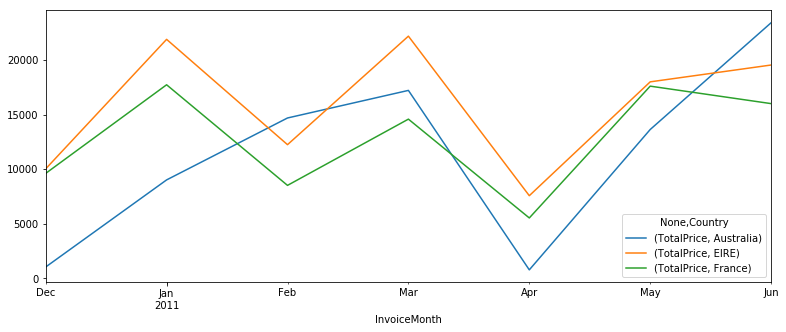

In [26]:
invoice_monthly[invoice_monthly.Country.isin(june_outliers.Country)].\
pivot(index='InvoiceMonth',
      columns='Country').\
plot(figsize= (13,5))

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

The docs pointed out, among other things, what parameters are accepted by the method. We will see the following entry under **Parameters**:

- **subplots** : _boolean, default False_
    - Make separate subplots for each columns
    
By passing in the `subplots` logical parameter as True, each of the countries will be rendered in different plots:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001581E66CCC0>,
      dtype=object)

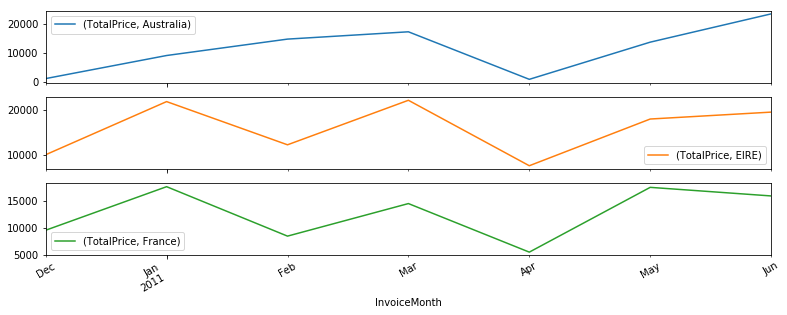

In [27]:
invoice_monthly[invoice_monthly.Country.isin(june_outliers.Country)].\
pivot(index='InvoiceMonth',
      columns='Country').\
plot(figsize= (13,5),
     subplots = True)

### Visualizing relationships between variable

Say, for example I wanted to known my customer's purchasing behaviour: how is the correlation between total invoice and numer of item bought? How does one affect the other and how is the common behaviour seen in our existing customers?

This hypothesis then leads me to create a plot that can illustrate how does the data distribution of amount paid over quantity bought is, to do that we will use *scatter plot*. Scatter plot might be one of the most used types of plot in understanding the distribution between numeric data.

In the following cells, we create a scatterplot that visualize the relationship of `ItemBought` and `TotalPrice` from the invoices of our "top countries":

In [28]:
top_countries = invoice_top_month.reset_index()['Country'].unique()
top_countries

[Australia, EIRE, France, Netherlands, Germany, Singapore, Japan, Spain]
Categories (8, object): [Australia, EIRE, France, Netherlands, Germany, Singapore, Japan, Spain]

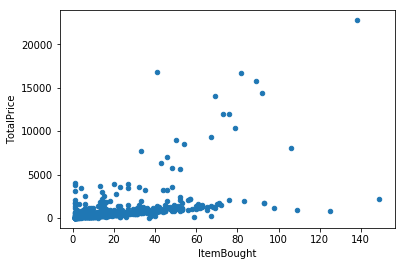

In [29]:
top_monthly = invoice_int[invoice_int['Country'].isin(top_countries)].copy()

top_monthly.plot(kind='scatter',
                 x= 'ItemBought',
                 y='TotalPrice')

(Optional): add color to pandas plot

In [30]:
color_dict = dict({
    'Australia':'b',
    'EIRE':'g',
    'France':'r',
    'Netherlands':'c',
    'Germany':'m',
    'Singapore':'y',
    'Japan':'k',
    'Spain':'w'
})
color_dict

{'Australia': 'b',
 'EIRE': 'g',
 'France': 'r',
 'Netherlands': 'c',
 'Germany': 'm',
 'Singapore': 'y',
 'Japan': 'k',
 'Spain': 'w'}

In [31]:
top_monthly['color'] = top_monthly.Country.map(color_dict)
top_monthly.head()

,ItemBought,TotalPrice,CustomerID,Country,InvoiceDate,InvoiceMonth,color
InvoiceNo,,,,,,,
536370,20,855.86,12583.0,France,2010-12-01 08:45:00,2010-12,r
536389,14,358.25,12431.0,Australia,2010-12-01 10:03:00,2010-12,b
536403,2,192.60,12791.0,Netherlands,2010-12-01 11:27:00,2010-12,c
536527,15,261.48,12662.0,Germany,2010-12-01 13:04:00,2010-12,m
536540,20,540.38,14911.0,EIRE,2010-12-01 14:05:00,2010-12,g


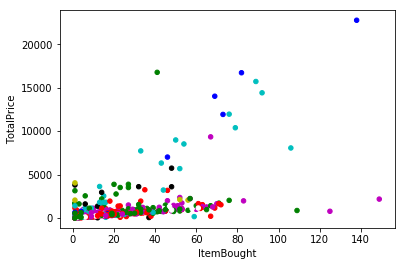

In [32]:
top_monthly.plot(kind='scatter',
                 x= 'ItemBought',
                 y='TotalPrice',
                 c= top_monthly.color)

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [36]:
print(plt.style.available)
plt.style.use('default')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Since we're unable to cover the entirety of `matplotlib`, I would recommend the official documentation for anyone wishing to gain a deeper level of familiarity with plotting using `pandas`'s implementation of `matplotlib`.

---

# Additional: Altair-Viz

There are many visualization libraries in Python, but most of them have very imperative APIs, in which, the user have to manually specify plotting steps, or required to focus more on the mechanics of the visualization.

In opposite, declarative visualization lets the user think about data and relationships, rather than incidental details. If you're familiar with R's `ggplot2`, `Altair` brings you the same advantages: less coding and easy understanding.

To understand the concept more, we'll start with the ‘Hello World’ of Altair. Now let's get started and import the package:

In [40]:
import altair as alt
print(alt.__version__)

3.2.0


*Tip: Altair works best with notebook version 5.3 or newer. Note that using Altair 3 in the notebook also requires version 2 or newer of the vega package to be installed and configured.* 

When we run Altair on Jupyter Notebook, we need to add renderers as below:

In [41]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

We're going to recreate the previous scatterplot from our `top_monthly` data:

In [ ]:
top_monthly = invoice_int[invoice_int['Country'].isin(top_countries)]

top_monthly.head()

Because the data type of `InvoiceMonth` might make an error on making plot `altair` style, one of the ways to prevent it by dropping the column.

In [44]:
top_monthly = top_monthly.drop(columns='InvoiceMonth')
top_monthly.dtypes

ItemBought              int64
TotalPrice            float64
CustomerID            float64
Country              category
InvoiceDate    datetime64[ns]
dtype: object


An Altair plot can have the following graphic components:

- A chart object
- Marks
- Encodings

The key idea is to declare links between *data* (as a chart object), and *visual encoding channels*, such as x and y axis, color, etc, with *marks* as its the geometrical element. The rest of the plot details are handled automatically.

Here, we declare `top_monthly` as our data, encoding `ItemBought` (`x`) and `TotalPrice` (`y`) in scatter chart (`mark_point()`) representation:

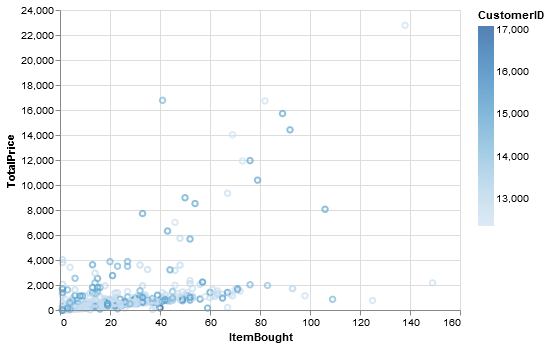

In [48]:
alt.Chart(top_monthly).mark_point().encode(
    x = 'ItemBought',
    y = 'TotalPrice')

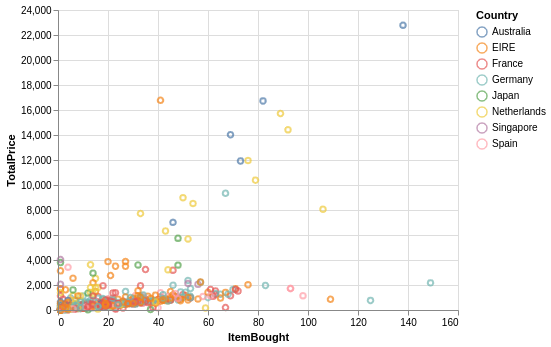

In [147]:
alt.Chart(top_monthly).mark_point().encode(
    x = 'ItemBought',
    y = 'TotalPrice',
    color = 'Country')

We can also add other chart properties, such as title, to make create a better explanatory visualization:

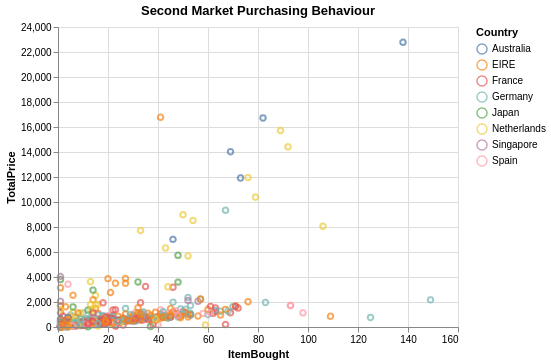

In [148]:
alt.Chart(top_monthly).mark_point().encode(
    x = 'ItemBought',
    y = 'TotalPrice',
    color = 'Country'
).properties(title = 'Second Market Purchasing Behaviour')

Another unique feature of Altair, inhereted from Vega-Lite, is a declarative grammar of not just visualization, but also interaction. For example, the `.interactive()` method lets us to scroll on the chart to zoom in and out as well as pan around:

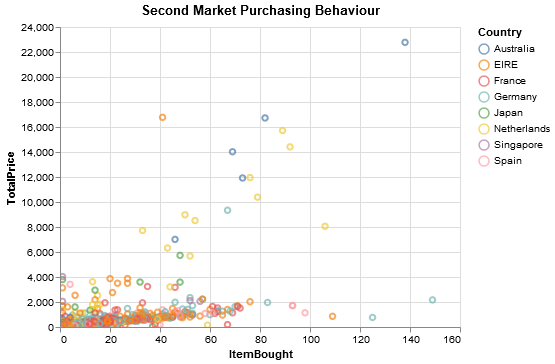

In [51]:
alt.Chart(top_monthly).mark_point().encode(
    x = 'ItemBought',
    y = 'TotalPrice',
    color = 'Country'
).properties(title = 'Second Market Purchasing Behaviour').interactive()

We can also add other Interactive features such as showing a hovering text by using the `tooltip`:

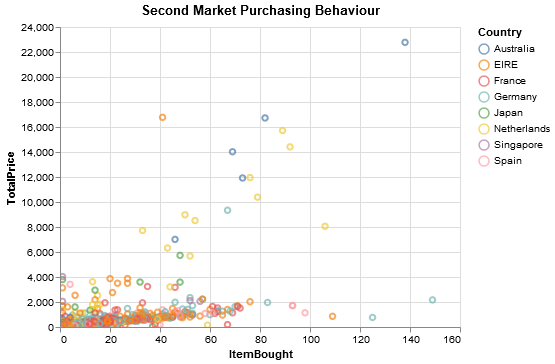

In [53]:
alt.Chart(top_monthly).mark_point().encode(
    x = 'ItemBought',
    y = 'TotalPrice',
    color = 'Country',
    tooltip = ['Country','CustomerID','InvoiceDate','TotalPrice','ItemBought']
).properties(title = 'Second Market Purchasing Behaviour').interactive()

The majority of our customers, can be seen in the bottom left and produced a similar shape as our entire transactions, but we can easily identify that there are several invoices from Netherland that tends to do a transaction with relatively large total invoice.

By adding `tooltip` to our encoding, we can also notice how the invoice from Netherland is created for the same customer with ID `14646`. This means that we can identify a customer that has a slightly higher amount of purchasing standard than other customers.


#### Extra references for Altair viz:

 https://speakerdeck.com/jakevdp/altair-tutorial-intro-pycon-2018?slide=12
 
 https://github.com/altair-viz/altair-tutorial/blob/master/notebooks/Index.ipynb
 